In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import time 
import json 
import math
import pickle
import google.generativeai as genai

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [4]:
df = pd.read_csv("./supermarket_sales.csv")

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [30]:
df['Profile'] = df.apply(lambda x: f"Customer type: {x['Customer type']}, Gender: {x['Gender']}, Product line: {x['Product line']}, City: {x['City']}", axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Profile                    0
dtype: int64

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


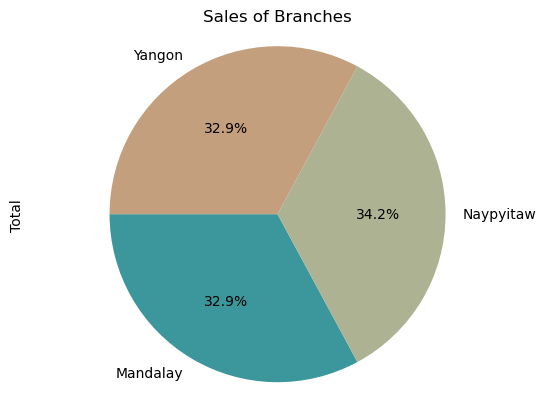

In [10]:
city = df.groupby('City')['Total'].sum()
print(city)

colors = ['#3B979B','#ACB292','#C49F7D']
ax = city.plot(kind = 'pie', autopct='%1.1f%%', colors = colors, startangle=180)
ax.axis('equal') 

plt.title('Sales of Branches')

plt.show()

In [11]:
product_line = df.groupby('Product line')['Total'].sum().sort_values().reset_index()
product_line.columns = ['Product line', 'Total sale']

fig = px.bar(product_line, x='Total sale', y='Product line', color = 'Total sale', orientation='h')

fig.update_layout(
    title = 'Sales of Product Lines',
    width=700, 
    height=500
)
fig.show()

e:\Anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\Anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['year'].unique()

df['month'] = df['Date'].dt.month
df['month'].unique()

array([1, 3, 2])

In [13]:
gender = df.groupby(['Product line', 'Gender']).size().reset_index()
gender.columns = ['Product line', 'Gender', 'Count']

# grouped bar chart
fig = px.bar(gender, x = 'Product line', y = 'Count', color = 'Gender', barmode = 'group')

# layouts
fig.update_layout(
    height = 500,
    width =900,
    title = 'Product line by Gender'
)
fig.show()

e:\Anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\Anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [14]:
Ctype_sale = df.groupby('Customer type')['Total'].sum().reset_index()

fig = px.pie(Ctype_sale, values='Total', names='Customer type',title='Total Sales by Customer Type')

fig.show()

e:\Anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\Anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [15]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Profile', 'year', 'month'],
      dtype='object')

In [16]:
objects = [ col for col, dtype in df.dtypes.items() if dtype == 'object'] 

In [17]:
lr = LabelEncoder()

In [18]:
for i in objects:
    df[i] = lr.fit_transform(df[i])

<Axes: >

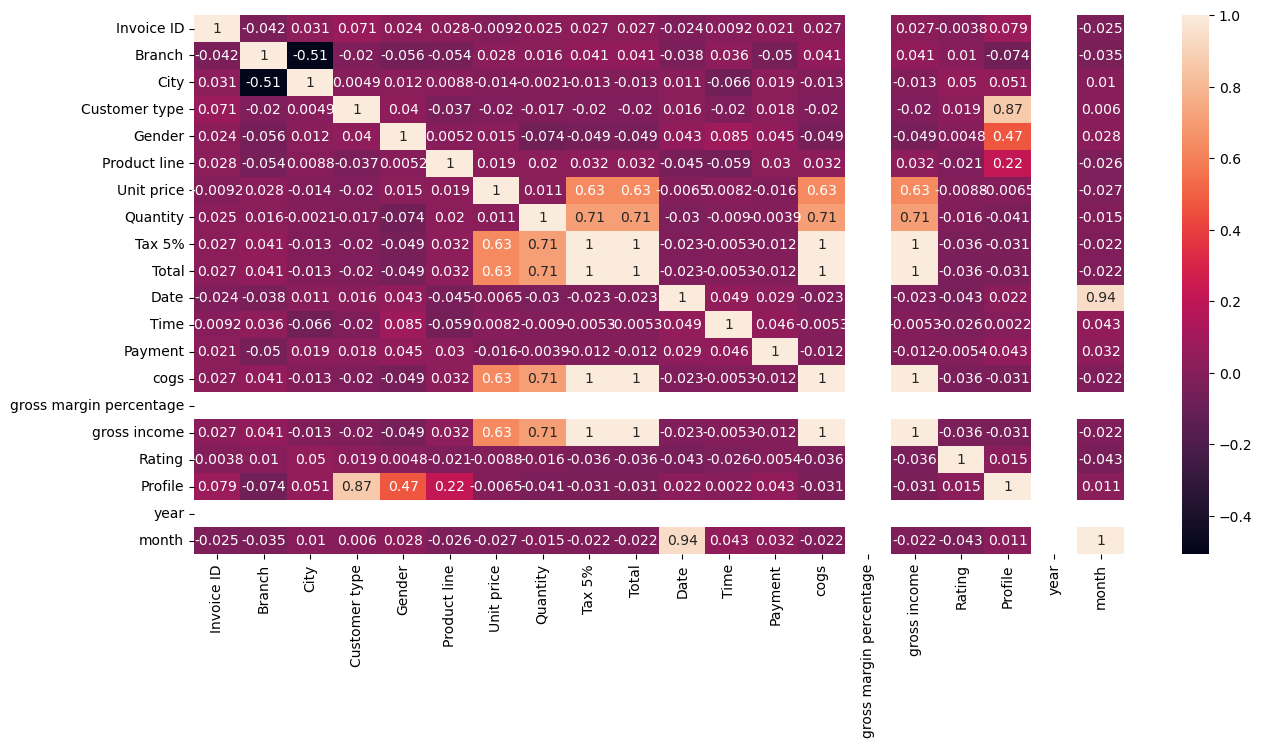

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

In [6]:
x = df.drop(['Invoice ID', 'Date', 'Time', 'gross income'], axis=1)
y = df['gross income']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
x_train['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [9]:
x_train

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,Rating
750,B,Mandalay,Member,Female,Fashion accessories,22.32,4,4.4640,93.7440,Ewallet,89.28,4.761905,4.1
485,B,Mandalay,Member,Female,Sports and travel,49.49,4,9.8980,207.8580,Ewallet,197.96,4.761905,6.6
708,C,Naypyitaw,Normal,Male,Fashion accessories,15.62,8,6.2480,131.2080,Ewallet,124.96,4.761905,9.1
302,C,Naypyitaw,Normal,Male,Food and beverages,48.61,1,2.4305,51.0405,Cash,48.61,4.761905,4.4
49,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.3150,867.6150,Ewallet,826.30,4.761905,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,B,Mandalay,Member,Male,Food and beverages,53.72,1,2.6860,56.4060,Ewallet,53.72,4.761905,6.4
90,C,Naypyitaw,Member,Female,Home and lifestyle,47.38,4,9.4760,198.9960,Cash,189.52,4.761905,7.1
276,C,Naypyitaw,Member,Female,Home and lifestyle,21.82,10,10.9100,229.1100,Cash,218.20,4.761905,7.1
670,A,Yangon,Member,Male,Fashion accessories,56.04,10,28.0200,588.4200,Ewallet,560.40,4.761905,4.4


In [22]:
model_linear = LinearRegression()

In [23]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model_linear.predict(x_test)

In [25]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 4.6263898208839686e-29
RMSE: 6.801756994250801e-15
R2 score: 1.0


In [25]:
model_rf = RandomForestRegressor()

In [26]:
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
y_pred_rf = model_rf.predict(x_test)

In [28]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R2 score: {r2_score(y_test, y_pred_rf)}")

Mean Squared Error: 0.004675770613500242
RMSE: 0.06837960670770374
R2 score: 0.9999664865048461


In [30]:
model_svm = SVR(kernel='rbf')

In [31]:
model_svm.fit(x_train, y_train)

SVR()

In [32]:
y_pred_svm = model_svm.predict(x_test)

In [33]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svm)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred_svm))}")
print(f"R2 score: {r2_score(y_test, y_pred_svm)}")

Mean Squared Error: 0.4354159881896705
RMSE: 0.6598605823881818
R2 score: 0.9968791643525081


In [34]:
model_tree = DecisionTreeRegressor(criterion="squared_error")

In [35]:
model_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
y_pred_tree = model_tree.predict(x_test)

In [37]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_tree)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"R2 score: {r2_score(y_test, y_pred_tree)}")

Mean Squared Error: 0.019408410833333337
RMSE: 0.1393140726320688
R2 score: 0.9998608905919103


# Sentiment analysis

In [21]:
df['Sentiment'] = df['Quantity'].apply(lambda x: 'Positive' if x >= 7 else 'Neutral')

In [40]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,Sentiment
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,146,2,522.83,4.761905,26.1415,9.1,2019,1,Positive
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,23,0,76.40,4.761905,3.8200,9.6,2019,3,Neutral
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,155,1,324.31,4.761905,16.2155,7.4,2019,3,Positive
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,485,2,465.76,4.761905,23.2880,8.4,2019,1,Positive
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,29,2,604.17,4.761905,30.2085,5.3,2019,2,Positive


In [42]:
print(df[['Product line', 'Quantity', 'Sentiment']])

     Product line  Quantity Sentiment
0               3         7  Positive
1               0         5   Neutral
2               4         7  Positive
3               3         8  Positive
4               5         7  Positive
..            ...       ...       ...
995             3         1   Neutral
996             4        10  Positive
997             2         1   Neutral
998             4         1   Neutral
999             1         7  Positive

[1000 rows x 3 columns]


# Cross selling 

In [45]:
basket = pd.get_dummies(df['Product line'])
basket = basket.groupby(df['Customer type']).sum()

In [47]:
basket = basket.applymap(lambda x: 1 if x >= 1 else 0)

frequent_items = apriori(basket, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

e:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [48]:
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

    antecedents      consequents  support  confidence
0           (0)              (1)      1.0         1.0
1           (1)              (0)      1.0         1.0
2           (0)              (2)      1.0         1.0
3           (2)              (0)      1.0         1.0
4           (0)              (3)      1.0         1.0
..          ...              ...      ...         ...
597         (1)  (0, 2, 3, 4, 5)      1.0         1.0
598         (2)  (0, 1, 3, 4, 5)      1.0         1.0
599         (3)  (0, 1, 2, 4, 5)      1.0         1.0
600         (4)  (0, 1, 2, 3, 5)      1.0         1.0
601         (5)  (0, 1, 2, 3, 4)      1.0         1.0

[602 rows x 4 columns]


# Behavioral Clustering

In [51]:
X = df[['Unit price', 'Quantity', 'Total']]
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



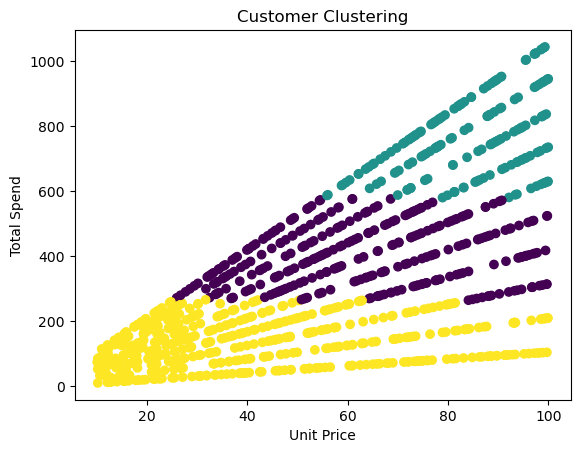

In [53]:
plt.scatter(df['Unit price'], df['Total'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Unit Price')
plt.ylabel('Total Spend')
plt.title('Customer Clustering')
plt.show()

# Personlized recommendation

In [28]:
df['Profile']

0      Customer type: 0, Gender: 0, Product line: 3, ...
1      Customer type: 1, Gender: 0, Product line: 0, ...
2      Customer type: 1, Gender: 1, Product line: 4, ...
3      Customer type: 0, Gender: 1, Product line: 3, ...
4      Customer type: 1, Gender: 1, Product line: 5, ...
                             ...                        
995    Customer type: 1, Gender: 1, Product line: 3, ...
996    Customer type: 1, Gender: 0, Product line: 4, ...
997    Customer type: 0, Gender: 1, Product line: 2, ...
998    Customer type: 1, Gender: 1, Product line: 4, ...
999    Customer type: 0, Gender: 0, Product line: 1, ...
Name: Profile, Length: 1000, dtype: object

# Gemini

In [ ]:
genai.configure(api_key="<API KEY>")

In [10]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash', tools="code_execution")

In [11]:
def recommendation_prompt(data):
    prompt = f""" 

    data: {data}

    based on the user data, you have provide the suggestion for the customers.

    """

In [17]:
def sentiment_prompt(gender, product_line, sentiment, rating, profile):
    prompt = f""" 

    gender: {gender}

    product line: {product_line}

    sentiment: {sentiment}

    rating: {rating}

    profile: {profile}

    based on the given data, you have provide below

    sentiment: <sentiment of the customer based on the data>
    
    recommendation: <provide the suggestion based on profile>

    Behaviour analysis: <provide some behaviour analysis of an customer>

    """
    return prompt

In [18]:
def generate_content(text):
    try:
        response = model.generate_content(text)
        return response
    except Exception as e:
        return e

In [22]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Profile', 'Sentiment'],
      dtype='object')

In [24]:
print(x_train)

NameError: name 'x_train' is not defined

In [23]:
print(generate_content(sentiment_prompt(df['Gender'][0], df['Product line'][0], df['Sentiment'][0], df['Rating'][0], df['Profile'][0])).text)

Here's a breakdown of the information provided, my analysis, and recommendations:

**Information:**

* **Gender:** Female
* **Product Line:** Health and Beauty
* **Sentiment:** Positive 
* **Rating:** 9.1 
* **Profile:**
    * **Customer Type:** Member
    * **Gender:** Female
    * **Product Line:** Health and Beauty
    * **City:** Yangon 

**Analysis:**

* **Sentiment:** The customer has a positive sentiment towards the product line. This is indicated by the "Positive" sentiment label and the high rating of 9.1.
* **Recommendation:** Based on the profile, here are some recommendations: 
    * **Personalized Product Suggestions:**  Since the customer is a member, you could leverage past purchase history or browsing data to recommend products relevant to her interests within the Health and Beauty category. 
    * **Exclusive Member Offers:** Offer discounts or exclusive promotions for members in the Health and Beauty line.
    * **Local Product Recommendations:** Given the customer's 